---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Tasks:
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what has been accomplished

<hr style="width:35%;margin-left:0;"> 

### Task 1: Exploratory data analysis

In [4]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#read dataset 
df = pd.read_csv("data/data.csv")
df.drop('ID', inplace=True, axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 7)

In [4]:
# check how many null values 
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
#Data summary
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


#### 1.1. Univariate Analysis 

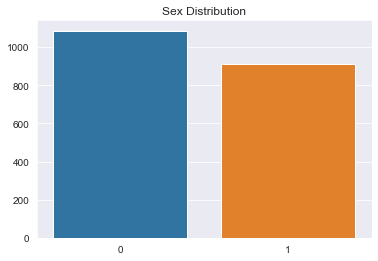

In [11]:
#Sex distribution 
sex = df.Sex.value_counts()
sns.set_style("darkgrid")
plt.title("Sex Distribution")
sns.barplot(x=sex.index, y=sex.values)
plt.show()

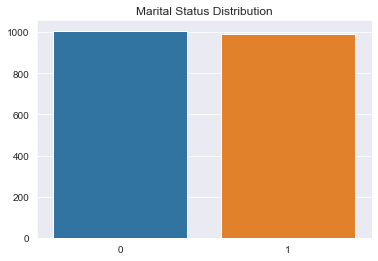

In [12]:
#Marrital status distribution 
marital = df['Marital status'].value_counts()
sns.set_style("darkgrid")
plt.title("Marital Status Distribution")
sns.barplot(x=marital.index, y=marital.values)
plt.show()

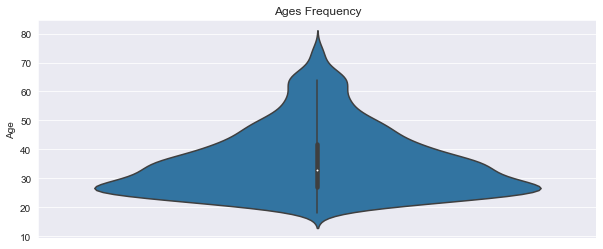

In [14]:
#Age frequency
plt.figure(figsize=(10,4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

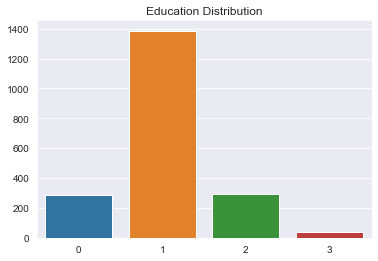

In [15]:
#Education distribution 
education = df.Education.value_counts()
sns.set_style("darkgrid")
plt.title("Education Distribution")
sns.barplot(x=education.index, y=education.values)
plt.show()

In [17]:
#Income range
ai35_90 = df["Income"][(df["Income"] >= 35000) & (df["Income"] < 90000)]
ai90_145 = df["Income"][(df["Income"] >= 90000) & (df["Income"] < 145000)]
ai145_200 = df["Income"][(df["Income"] >= 145000) & (df["Income"] < 200000)]
ai200_255 = df["Income"][(df["Income"] >= 200000) & (df["Income"] < 255000)]
ai255_310 = df["Income"][(df["Income"] >= 255000) & (df["Income"] < 310000)]

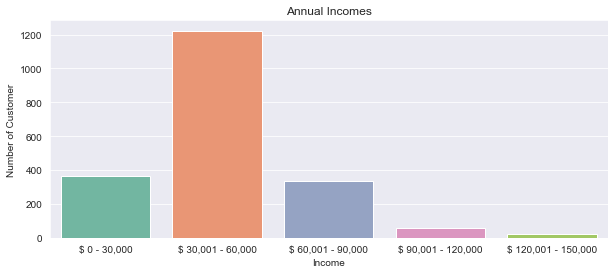

In [20]:
#Income intervals 
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai35_90.values), len(ai90_145.values), len(ai145_200.values), len(ai200_255.values), len(ai255_310.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

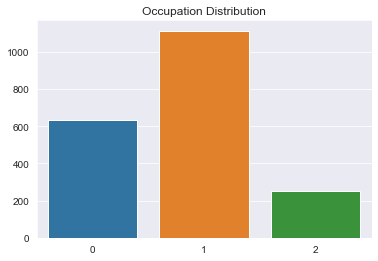

In [21]:
#Occupation distribution 
occ = df['Occupation'].value_counts()
sns.set_style("darkgrid")
plt.title("Occupation Distribution")
sns.barplot(x=occ.index, y=occ.values)
plt.show()

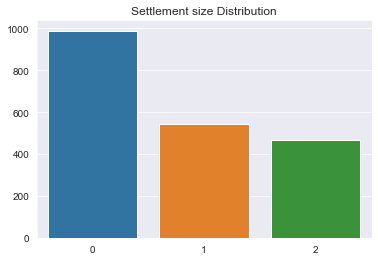

In [22]:
ss = df['Settlement size'].value_counts()
sns.set_style("darkgrid")
# plt.figure(figsize=(10,4))
plt.title("Settlement size Distribution")
sns.barplot(x=ss.index, y=ss.values)
plt.show()

#### 1.2. Bivariate Analysis

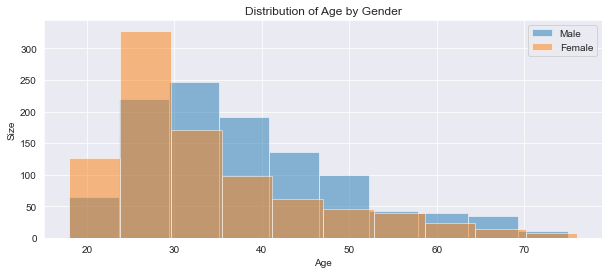

In [61]:
#Age distribution by gender
plt.figure(figsize=(10,4))
plt.hist('Age', data=df[df['Sex'] == 0], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Sex'] == 1], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.ylabel('Size')
plt.legend();

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

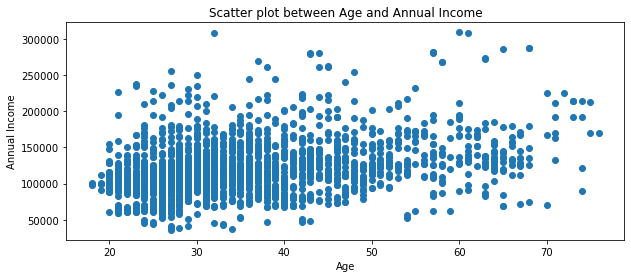

In [7]:
#Annual Income by Age
plt.figure(figsize=(10,4))
plt.scatter(df['Age'],df['Income'], marker='o');
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Age and Annual Income')

#### 1.3. Multiriate Analysis

<AxesSubplot:>

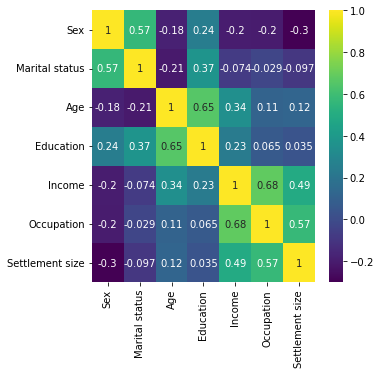

In [6]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

### Task 2: Clustering analysis

#### 2.1. KMeans Clustering Technique

Overview: an Unsupervised Learning algorithm to group unlabeled dataframe into clusters. 

K: the number of pre-defined clusters to be identified during the process.

In [15]:
#Checking the copied dataframe 
df1 = df.copy()
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


C:\Users\haiho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


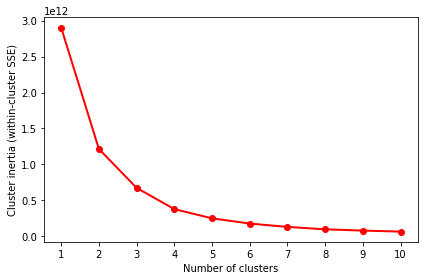

In [7]:
#Now we compute within-cluster SSE to determine optimal k
from sklearn.cluster import KMeans

inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df1)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, linewidth=2, color="red", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

Here we can assume that k = 4 will be a good value.

In [8]:
km_plus = KMeans(n_clusters=4, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(df1)
df1["Label"] = y_km_plus
#The current dataset with labels
df1.head() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [9]:
km_plus.labels_

array([3, 0, 1, ..., 1, 3, 1])

In [12]:
km_plus.cluster_centers_

array([[3.05010893e-01, 4.37908497e-01, 4.09629630e+01, 1.20043573e+00,
        1.54064475e+05, 1.24836601e+00, 1.23747277e+00],
       [5.40372671e-01, 5.11387164e-01, 3.22318841e+01, 8.94409938e-01,
        7.90856128e+04, 1.53209110e-01, 1.63561077e-01],
       [2.85714286e-01, 4.00000000e-01, 4.45904762e+01, 1.34285714e+00,
        2.25124867e+05, 1.77142857e+00, 1.46666667e+00],
       [5.06820567e-01, 5.27806925e-01, 3.43819517e+01, 9.98950682e-01,
        1.14750034e+05, 8.26862539e-01, 7.10388248e-01]])

In [13]:
df1['Label'].value_counts()

3    955
1    483
0    457
2    105
Name: Label, dtype: int64

It is evident that each cluster has different number of entries. Specifically, while the third cluster is dominant, the second one has the smallest scope in comparison with others. Now we identify each cluster: 

In [14]:
#divide to 4 clusters
km_plus_c1 = df1[df1["Label"] == 0] 
km_plus_c2 = df1[df1["Label"] == 1] 
km_plus_c3 = df1[df1["Label"] == 2] 
km_plus_c4 = df1[df1["Label"] == 3] 

As building these different clusters is completed, different customer segments will be thoroughly assessed.

In [15]:
#Calculating averages of all features for each cluster
avg_df = df1.groupby(['Label'], as_index=False).mean()
avg_df

,Label,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.301969,0.435449,40.927790,1.192560,154150.634573,1.249453,1.238512
1,1,0.540373,0.511387,32.231884,0.894410,79085.612836,0.153209,0.163561
2,2,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667
3,3,0.507853,0.528796,34.412565,1.003141,114791.137173,0.827225,0.710995


In [64]:
#Data summary of cluster 1
km_plus_c1.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.0
mean,0.301969,0.435449,40.927790,1.192560,154150.634573,1.249453,1.238512,0.0
std,0.459615,0.496359,12.400005,0.677092,13990.010483,0.568860,0.693014,0.0
min,0.000000,0.000000,20.000000,0.000000,134433.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,31.000000,1.000000,142193.000000,1.000000,1.000000,0.0
50%,0.000000,0.000000,38.000000,1.000000,151947.000000,1.000000,1.000000,0.0
75%,1.000000,1.000000,50.000000,2.000000,165147.000000,2.000000,2.000000,0.0
max,1.000000,1.000000,76.000000,3.000000,189166.000000,2.000000,2.000000,0.0


Cluster 1: 
- 457 entries 
- Sex's mean value of 0.3 indicates the majority of male in this cluster 
- Single 
- Middle-aged people 
- finished high school 
- educated employees with high income 
- mid-sized city 

In [17]:
#Data summary of cluster 2
km_plus_c2.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.0
mean,0.540373,0.511387,32.231884,0.89441,79085.612836,0.153209,0.163561,1.0
std,0.498884,0.500389,9.716525,0.53433,13168.344095,0.377430,0.499125,0.0
min,0.000000,0.000000,19.000000,0.00000,35832.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,25.000000,1.00000,69417.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,29.000000,1.00000,81743.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,38.000000,1.00000,89885.500000,0.000000,0.000000,1.0
max,1.000000,1.000000,74.000000,3.00000,96840.000000,2.000000,2.000000,1.0


Cluster 2: 
- 483 entries 
- young adults 
- finished high school 
- low income 
- unemployed 
- small city 

In [18]:
#Data summary of cluster 3
km_plus_c3.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667,2.0
std,0.453921,0.492248,14.626566,0.782360,31755.047890,0.421927,0.636497,0.0
min,0.000000,0.000000,21.000000,0.000000,189896.000000,1.000000,0.000000,2.0
25%,0.000000,0.000000,32.000000,1.000000,200298.000000,2.000000,1.000000,2.0
50%,0.000000,0.000000,43.000000,1.000000,214732.000000,2.000000,2.000000,2.0
75%,1.000000,1.000000,55.000000,2.000000,241068.000000,2.000000,2.000000,2.0
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,2.0


Cluster 3: 
- 105 entries 
- Male 
- Middle-aged
- finished high school
- Medium income 
- high-qualified employees 
- mid-sized city 

In [19]:
#Data summary of cluster 4
km_plus_c4.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Label
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.0
mean,0.507853,0.528796,34.412565,1.003141,114791.137173,0.827225,0.710995,3.0
std,0.500200,0.499432,10.668801,0.538838,10208.641245,0.442136,0.798475,0.0
min,0.000000,0.000000,18.000000,0.000000,96952.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,26.000000,1.000000,106633.000000,1.000000,0.000000,3.0
50%,1.000000,1.000000,32.000000,1.000000,114007.000000,1.000000,0.000000,3.0
75%,1.000000,1.000000,40.000000,1.000000,123521.000000,1.000000,1.000000,3.0
max,1.000000,1.000000,74.000000,3.000000,134377.000000,2.000000,2.000000,3.0


Cluster 4: 
- 955 entries 
- young adults 
- high school educated 
- skilled employee with low income 
- small city 

#### 2.2. Hierarchical Clustering Technique

Overview: an Unsupervised Machine Learning technique to group data entries into clusters. It is instead a bottom-up approach where each entry is assigned to its own cluster and then combined with other clusters. 

Using the number of clusters decided by KMeans Clustering, Hierarchical Clustering will be conducted with 4 clusters. 

In [12]:
df2 = df.copy()
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [13]:
from sklearn.cluster import AgglomerativeClustering

# ---------- 4 clusters --------------

ac = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='ward')
labels = ac.fit_predict(df2)
print('Cluster labels: %s' % labels)

Cluster labels: [3 2 1 ... 1 1 1]


In [14]:
df2['Labels'] = labels
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [ ]:
#The number of entries per cluster
df2['Labels'].value_counts()

In [24]:
#Divide into 4 clusters 
hc_c1 = df2[df2["Labels"] == 0] 
hc_c2 = df2[df2["Labels"] == 1] 
hc_c3 = df2[df2["Labels"] == 2] 
hc_c4 = df2[df2["Labels"] == 3] 

In [25]:
#Calculating averages of all features for each cluster
avg_df2 = df2.groupby(['Labels'], as_index=False).mean()
avg_df2

,Labels,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.290909,0.400000,44.727273,1.345455,223444.563636,1.745455,1.454545
1,1,0.558929,0.535714,31.907143,0.898214,81766.741071,0.239286,0.214286
2,2,0.311609,0.446029,40.702648,1.193483,152156.739308,1.228106,1.215886
3,3,0.495828,0.512515,34.618594,1.000000,115413.113230,0.824791,0.716329


In [26]:
#Data summary of Cluster 1
hc_c1.describe() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,0.290909,0.40000,44.727273,1.345455,223444.563636,1.745455,1.454545,0.0
std,0.456260,0.49214,14.465339,0.771468,31968.430187,0.437599,0.630077,0.0
min,0.000000,0.00000,21.000000,0.000000,187549.000000,1.000000,0.000000,0.0
25%,0.000000,0.00000,32.500000,1.000000,196933.250000,1.250000,1.000000,0.0
50%,0.000000,0.00000,43.000000,1.000000,214364.000000,2.000000,2.000000,0.0
75%,1.000000,1.00000,56.500000,2.000000,237415.250000,2.000000,2.000000,0.0
max,1.000000,1.00000,75.000000,3.000000,309364.000000,2.000000,2.000000,0.0


Cluster 1: 
- male 
- middle-aged 
- high school educated 
- high income 
- high qualified employees 
- mid-sized city 

In [27]:
#Data summary of Cluster 2
hc_c2.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.0
mean,0.558929,0.535714,31.907143,0.898214,81766.741071,0.239286,0.214286,1.0
std,0.496959,0.499169,9.583189,0.520077,13958.018652,0.451465,0.555161,0.0
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,25.000000,1.000000,70920.750000,0.000000,0.000000,1.0
50%,1.000000,1.000000,29.000000,1.000000,84596.500000,0.000000,0.000000,1.0
75%,1.000000,1.000000,38.000000,1.000000,93662.500000,0.000000,0.000000,1.0
max,1.000000,1.000000,74.000000,3.000000,100313.000000,2.000000,2.000000,1.0


Cluster 2: 
- female 
- young adults 
- high school educated 
- low income 
- unemployed 
- small ciy 

In [29]:
#Data summary of Cluster 3s
hc_c3.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0
mean,0.311609,0.446029,40.702648,1.193483,152156.739308,1.228106,1.215886,2.0
std,0.463623,0.497586,12.415148,0.703663,14164.072912,0.565058,0.710154,0.0
min,0.000000,0.000000,20.000000,0.000000,132145.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,31.000000,1.000000,139483.500000,1.000000,1.000000,2.0
50%,0.000000,0.000000,37.000000,1.000000,149653.000000,1.000000,1.000000,2.0
75%,1.000000,1.000000,49.000000,2.000000,162799.500000,2.000000,2.000000,2.0
max,1.000000,1.000000,76.000000,3.000000,184753.000000,2.000000,2.000000,2.0


In [30]:
#Data summary of Cluster 4
hc_c4.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0
mean,0.495828,0.512515,34.618594,1.000000,115413.113230,0.824791,0.716329,3.0
std,0.500281,0.500141,10.629245,0.519317,8825.368738,0.435923,0.798631,0.0
min,0.000000,0.000000,18.000000,0.000000,100392.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,26.000000,1.000000,107768.000000,1.000000,0.000000,3.0
50%,0.000000,1.000000,32.000000,1.000000,114784.000000,1.000000,0.000000,3.0
75%,1.000000,1.000000,40.000000,1.000000,123198.000000,1.000000,1.000000,3.0
max,1.000000,1.000000,74.000000,3.000000,131842.000000,2.000000,2.000000,3.0


#### Task 3: Clustering techniques comparison

C:\Users\haiho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


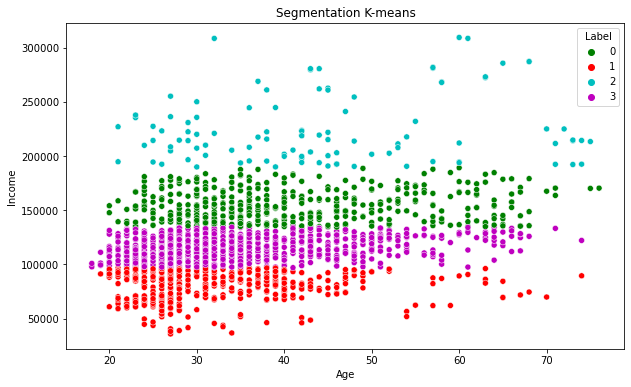

In [20]:
x_axis = df1['Age']
y_axis = df1['Income']
plt.figure(figsize = (10, 6))
sns.scatterplot(x_axis, y_axis, hue = df1['Label'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

C:\Users\haiho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


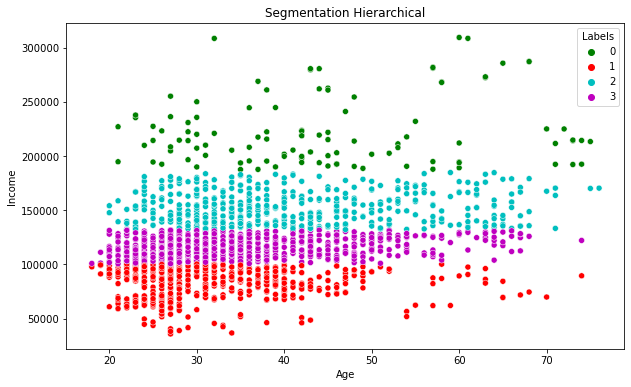

In [19]:
x_axis = df2['Age']
y_axis = df2['Income']
plt.figure(figsize = (10, 6))
sns.scatterplot(x_axis, y_axis, hue = df2['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation Hierarchical')
plt.show()